# Importing Project Dependencies
---

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('twitchdata.csv') #importing our data

In [5]:
df.head() #checking the head of our data

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


# Data Preprocessing
---

In [6]:
df.isnull().sum() #checking for null values in our data

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

In [7]:
df.dtypes #checking the type of each column

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


# Exploratory Data Analysis
---

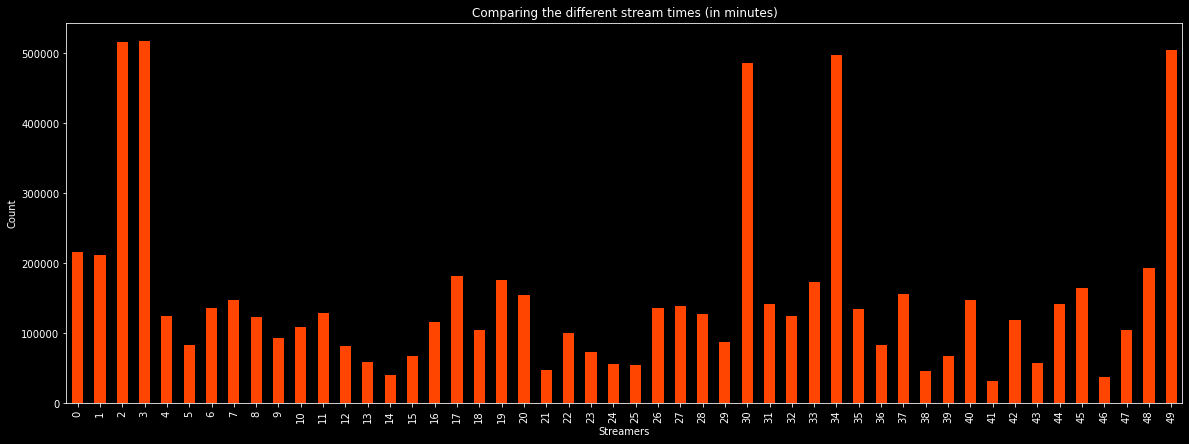

In [9]:
plt.style.use('dark_background') #checking the stream times of top 50 streamers
plt.figure(figsize = (20,7))
df['Stream time(minutes)'].head(50).plot.bar(color = 'orangered')
plt.title('Comparing the different stream times (in minutes)')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show()

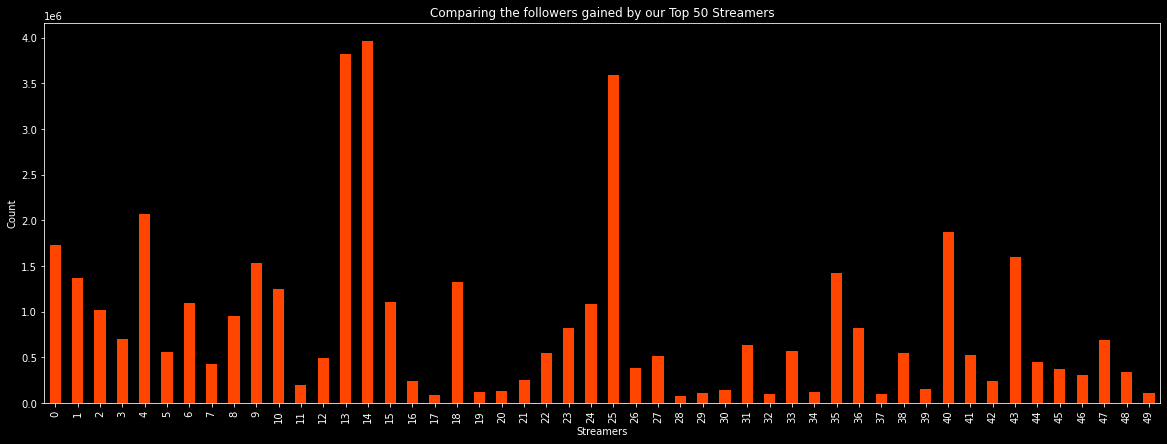

In [10]:
plt.style.use('dark_background') #checking the followers gained by our Top 50 Streamers
plt.figure(figsize = (20,7))
df['Followers gained'].head(50).plot.bar(color = 'orangered')
plt.title('Comparing the followers gained by our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show() 

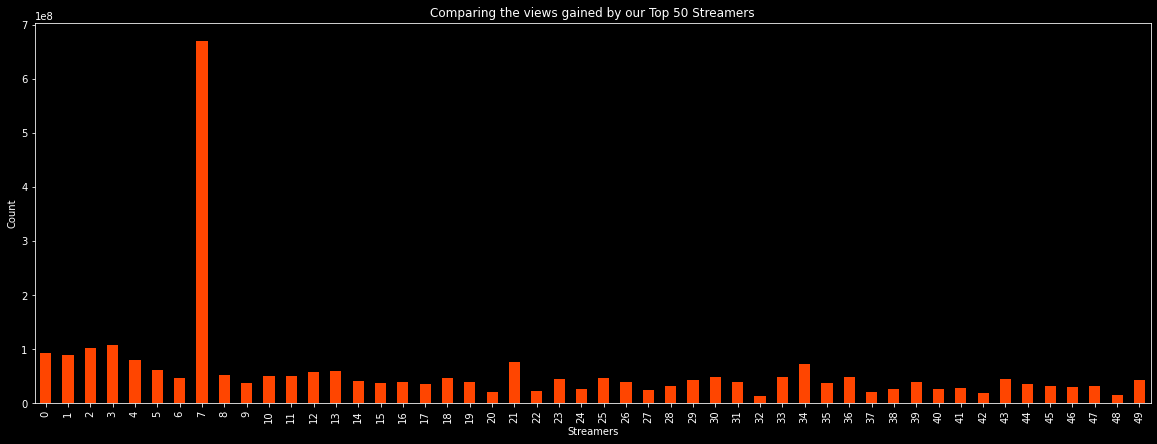

In [11]:
plt.style.use('dark_background') #checking the views gained by our Top 50 Streamers
plt.figure(figsize = (20,7))
df['Views gained'].head(50).plot.bar(color = 'orangered')
plt.title('Comparing the views gained by our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show() 

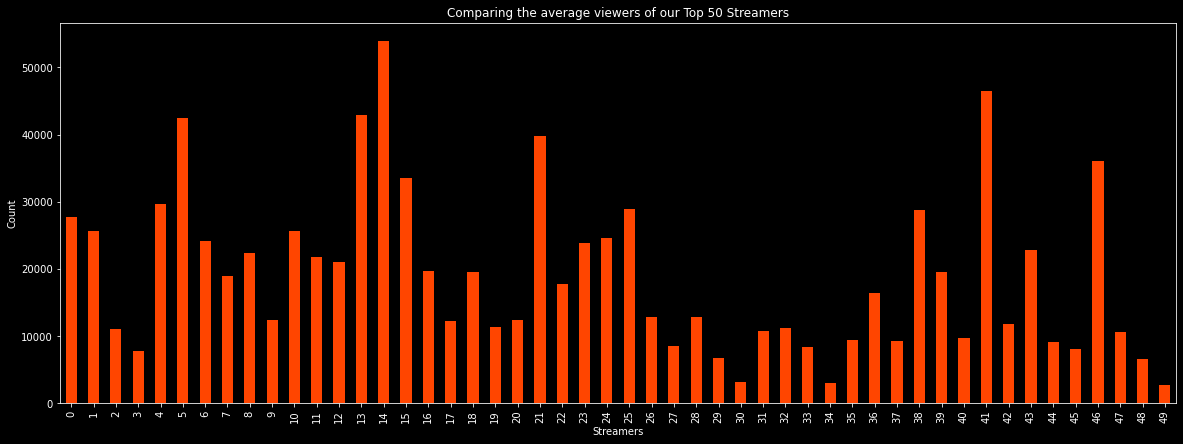

In [12]:
plt.style.use('dark_background') #checking the Average nmber of viewers of our Top 50 Streamers
plt.figure(figsize = (20,7))
df['Average viewers'].head(50).plot.bar(color = 'orangered')
plt.title('Comparing the average viewers of our Top 50 Streamers')
plt.xlabel('Streamers')
plt.ylabel('Count')
plt.show() 

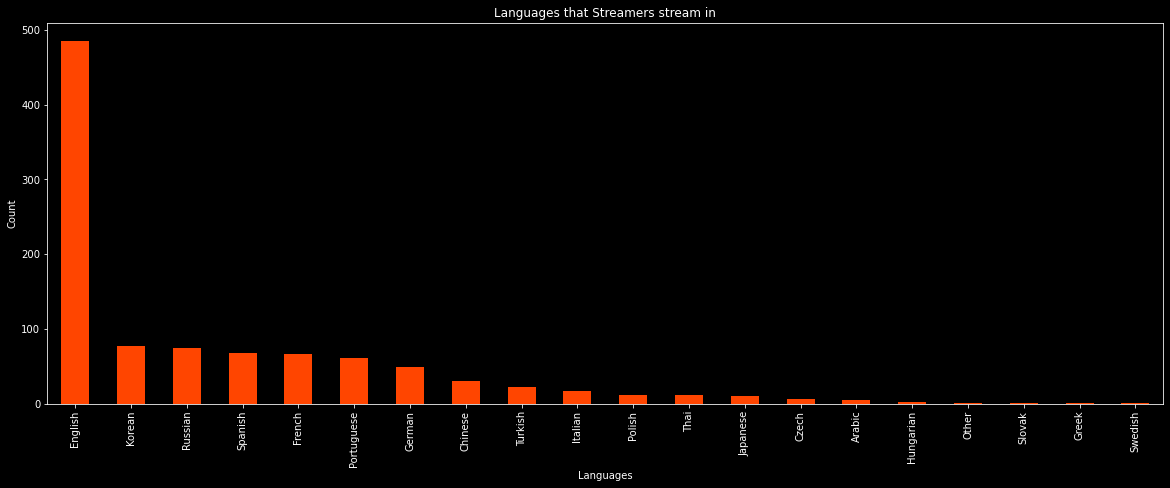

In [13]:
plt.style.use('dark_background') #checking the streamers that stream in a perticular language
plt.figure(figsize = (20,7))
df['Language'].value_counts().head(20).plot.bar(color = 'orangered')
plt.title('Languages that Streamers stream in')
plt.xlabel('Languages')
plt.ylabel('Count')
plt.show()

In [14]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

<AxesSubplot:xlabel='Partnered', ylabel='count'>

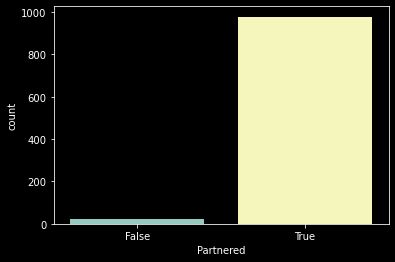

In [15]:
sns.countplot(x='Partnered',data = df) #checking how many are twitch partnered

In [16]:
df[df['Partnered'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10) #checking the top 10 streamers that are twitch partnered

,Channel,Watch time(Minutes),Stream time(minutes),Followers
0,xQcOW,6196161750,215250,3246298
1,summit1g,6091677300,211845,5310163
2,Gaules,5644590915,515280,1767635
3,ESL_CSGO,3970318140,517740,3944850
4,Tfue,3671000070,123660,8938903
5,Asmongold,3668799075,82260,1563438
6,NICKMERCS,3360675195,136275,4074287
7,Fextralife,3301867485,147885,508816
8,loltyler1,2928356940,122490,3530767
9,Anomaly,2865429915,92880,2607076


<AxesSubplot:xlabel='Mature', ylabel='count'>

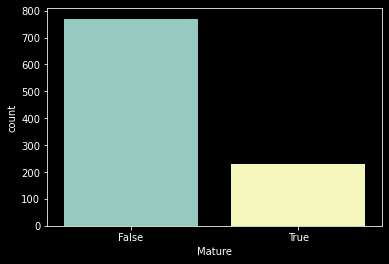

In [17]:
sns.countplot(x='Mature',data = df) #checking how many streams are tagged as mature

In [18]:
df[df['Mature'] == True][['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers']].head(10) #checking the top 10 streamers with mature streams

,Channel,Watch time(Minutes),Stream time(minutes),Followers
2,Gaules,5644590915,515280,1767635
10,TimTheTatman,2834436990,108780,5265659
15,MontanaBlack88,2408460990,67740,2911316
16,sodapoppin,2329440420,115305,2786162
24,TheRealKnossi,1811696100,56010,1260160
32,MOONMOON,1527882945,124680,923448
42,ROSHTEIN,1435735725,118995,381918
45,Sardoche,1361024835,164235,746865
55,Gorgc,1252711830,141135,391726
63,Quin69,1186941750,174270,538532


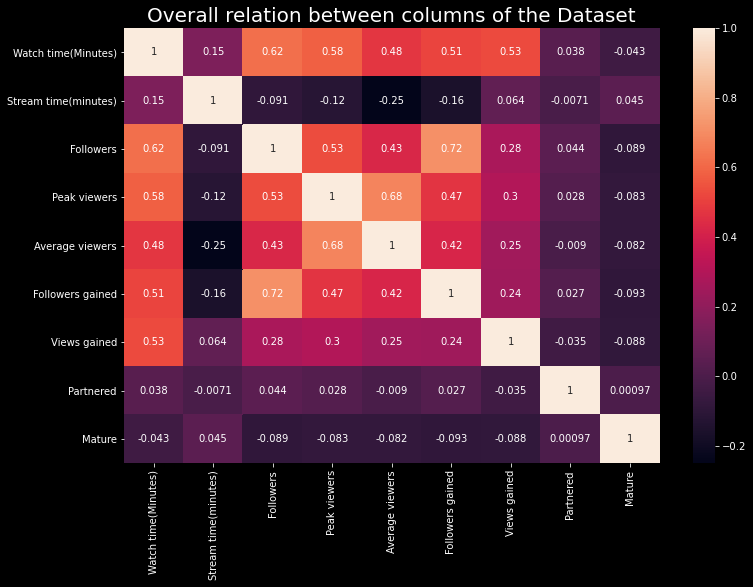

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['Channel', 'Watch time(Minutes)', 'Stream time(minutes)', 'Followers','Peak viewers','Average viewers','Followers gained','Views gained','Partnered','Mature','Language']].corr(), annot = True) #overall correlation between the various columns present in our data
plt.title('Overall relation between columns of the Dataset', fontsize = 20)
plt.show()

In [20]:
def streamer(x): #method to check stats of an individual streamer
    return df.loc[df['Channel']==x]

In [21]:
def lang(x): #method to check the details about a streamer that streams in a particular language
        return df[df['Language'] == x][['Channel','Followers','Partnered','Mature']].head(10)

In [22]:
streamer('Anomaly')

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
9,Anomaly,2865429915,92880,125408,12377,2607076,1532689,36350662,True,False,English


In [23]:
lang('Spanish')

,Channel,Followers,Partnered,Mature
13,Rubius,5751354,True,False
14,auronplay,3983847,True,False
25,TheGrefg,3795667,True,False
43,ibai,1894953,True,False
69,LVPes,587677,True,False
103,elded,2601858,True,False
105,juansguarnizo,1204773,True,False
129,ElmiilloR,426716,True,False
147,coscu,1865296,True,False
160,MYM_ALKAPONE,770535,True,False


C:\Users\naror\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


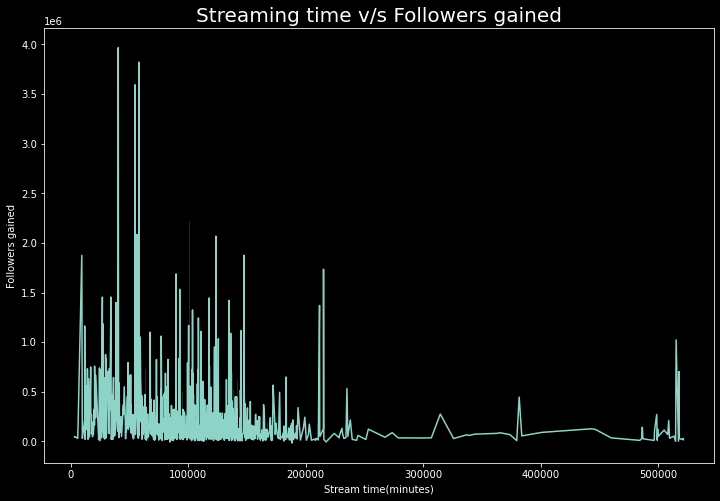

In [24]:
plt.figure(figsize=(12,8)) #comparing streaming time v/s followers gained
sns.lineplot(df['Stream time(minutes)'], df['Followers gained'], palette = "Set1")
plt.title('Streaming time v/s Followers gained', fontsize = 20)
plt.show()

C:\Users\naror\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


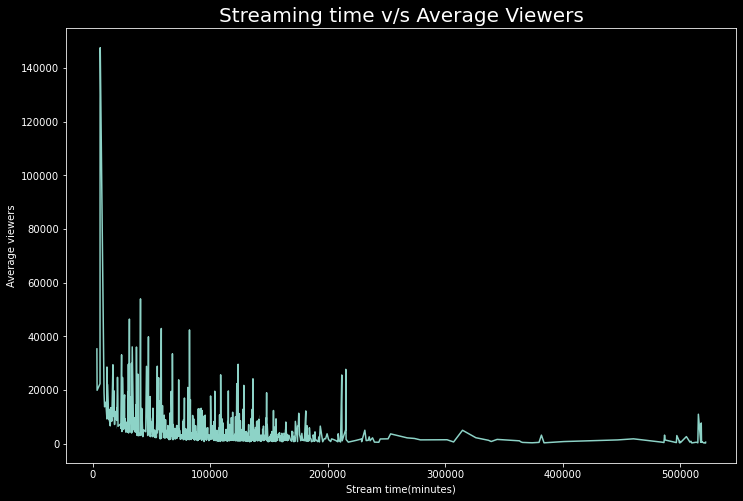

In [25]:
plt.figure(figsize=(12,8)) #comparing streaming time v/s average viewers
sns.lineplot(df['Stream time(minutes)'], df['Average viewers'], palette = "Set1")
plt.title('Streaming time v/s Average Viewers', fontsize = 20)
plt.show()

In [26]:
df.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [27]:
def streamtime(x): #method to check the streamer that had the most streaming time in our data
    return df.loc[df['Stream time(minutes)']==x]
def watchtime(x): #method to check the streamer that had the most watch time in our data
    return df.loc[df['Watch time(Minutes)']==x]
def avgviewers(x): #method to check the streamer that had the most number of average viewers
    return df.loc[df['Average viewers']==x]
def follow(x): #method to check the streamer that had the most followers in our data
    return df.loc[df['Followers']==x] 
def followgained(x): #method to check the streamer that had the most followers gained in our data
    return df.loc[df['Followers gained']==x] 
def viewgained(x): #method to check the streamer that had the most views gained in our data
    return df.loc[df['Views gained']==x] 

In [28]:
streamtime(df['Stream time(minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
392,RiffTrax,293583075,521445,24765,562,79099,17200,3313465,True,False,English


In [29]:
watchtime(df['Watch time(Minutes)'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English


In [30]:
avgviewers(df['Average viewers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
81,dota2ti,1017577605,6315,483530,147643,663297,121422,16228039,True,False,English


In [31]:
follow(df['Followers'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [32]:
followgained(df['Followers gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
14,auronplay,2410022550,40575,170115,53986,3983847,3966525,41514854,True,False,Spanish


In [33]:
viewgained(df['Views gained'].max())

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
7,Fextralife,3301867485,147885,68795,18985,508816,425468,670137548,True,False,English


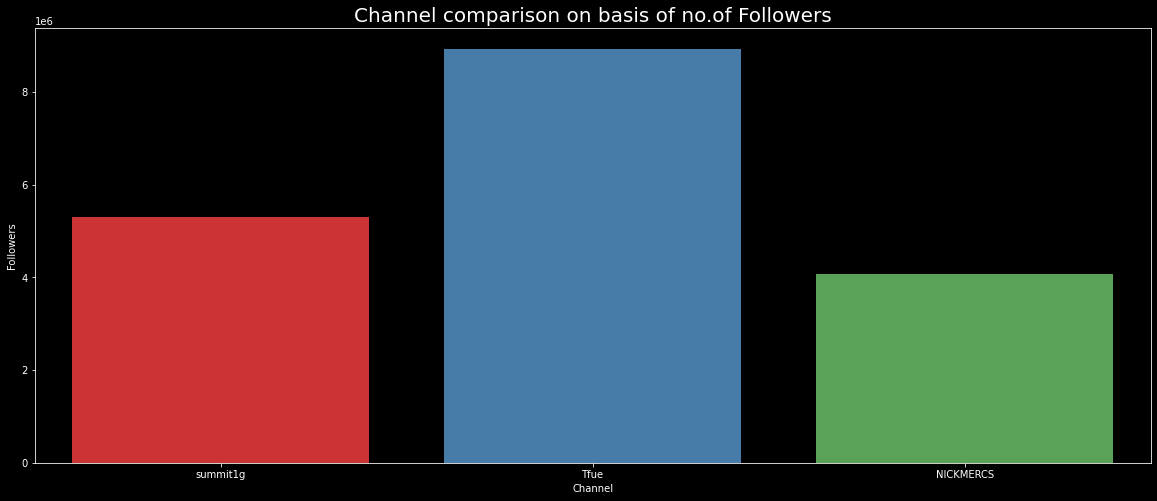

In [34]:
plt.figure(figsize=(20,8)) #comparing streamers on basis of their number of followers
top = ('Tfue', 'summit1g','NICKMERCS')
df2 = df.loc[df['Channel'].isin(top)  & df['Followers'] ]

ax = sns.barplot(x=df2['Channel'], y=df2['Followers'], palette="Set1");
ax.set_title(label='Channel comparison on basis of no.of Followers', fontsize=20);

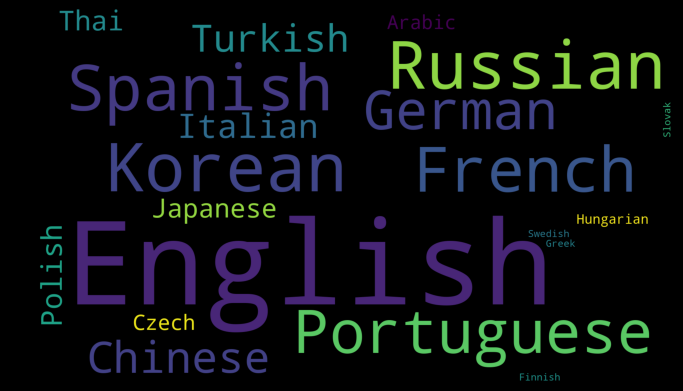

In [36]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Language))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

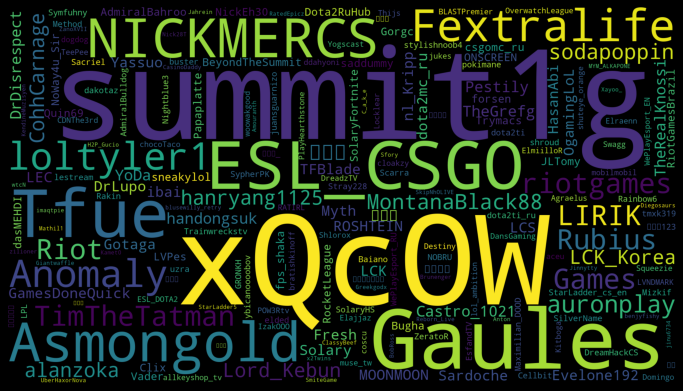

In [37]:
from wordcloud import WordCloud
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Channel))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Modeling
---

In [38]:
df1 = df.copy()

In [39]:
df1.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [40]:
df1.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
X = df1[['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']]
y = df1['Followers gained']

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 101)

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
linear  = LinearRegression()
linear.fit(X_train,y_train)
pred = linear.predict(X_test)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, pred)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, pred))))

r2 score: 0.5366031433627447
RMSE : 202315.23271199074


In [47]:
df1.head()

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English


In [48]:
user_input = [[6196161750,215250,222720,27716,3246298,93036735]]        #['Watch time(Minutes)','Stream time(minutes)','Peak viewers','Average viewers','Followers','Views gained']
user_pred = linear.predict(user_input)
print("Follower Gained by the streamer are:-",user_pred)

Follower Gained by the streamer are:- [2.26501821e+14]


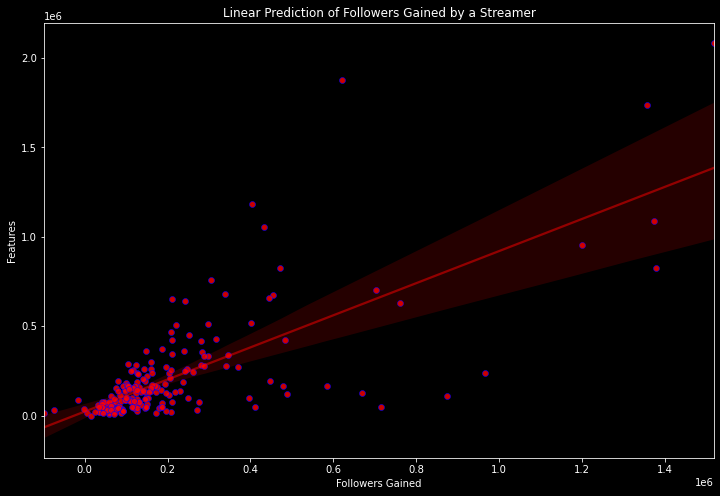

In [59]:
#Visualising the results
plt.figure(figsize=(12,8))
sns.regplot(x=pred,y=y_test,scatter_kws={'color':'red','edgecolor':'blue','linewidth':0.7},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Followers Gained')
plt.ylabel('Features')
plt.title("Linear Prediction of Followers Gained by a Streamer")
plt.show()